In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
data= pd.read_csv('H:\Dataset\creditcard.csv', header='infer',encoding='utf-8' )

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    20000 non-null  int64  
 1   V1      20000 non-null  float64
 2   V2      20000 non-null  float64
 3   V3      20000 non-null  float64
 4   V4      20000 non-null  float64
 5   V5      20000 non-null  float64
 6   V6      20000 non-null  float64
 7   V7      20000 non-null  float64
 8   V8      20000 non-null  float64
 9   V9      20000 non-null  float64
 10  V10     20000 non-null  float64
 11  V11     20000 non-null  float64
 12  V12     20000 non-null  float64
 13  V13     20000 non-null  float64
 14  V14     20000 non-null  float64
 15  V15     20000 non-null  float64
 16  V16     20000 non-null  float64
 17  V17     20000 non-null  float64
 18  V18     20000 non-null  float64
 19  V19     20000 non-null  float64
 20  V20     20000 non-null  float64
 21  V21     20000 non-null  float64
 22

In [13]:
data.shape

(20000, 31)

In [14]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [15]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [21]:
# class is our target column , 1 for fraudulent transactions, 0 otherwise
data['Class'].value_counts()

0    19936
1       64
Name: Class, dtype: int64

In [24]:
X=data.iloc[:,0:30]
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,47051,1.254059,-0.786311,0.286283,-0.666334,-0.951138,-0.389992,-0.560189,-0.024899,-0.790512,...,0.192768,0.040335,-0.060404,-0.100546,0.024825,0.457905,-0.304989,-0.008119,0.012787,75.44
19996,47052,-1.883323,0.104475,1.931791,-3.691559,-0.196086,1.630184,-0.391184,1.133396,2.757721,...,-0.218017,-0.134996,0.395790,-0.229124,-1.004798,0.596717,-0.950903,0.115782,-0.134574,7.74
19997,47052,1.184662,-0.216035,0.651774,-0.168070,-0.769154,-0.379905,-0.482859,0.188342,0.333287,...,-0.186540,-0.058520,-0.224482,0.157778,0.247821,-0.060009,0.908928,-0.066832,-0.005374,0.77
19998,47053,0.829086,-0.420209,-0.323887,1.118331,-0.078426,-0.392259,0.545886,-0.259599,-0.032113,...,0.401778,0.124450,-0.134035,-0.422629,-0.422666,0.719097,-0.303521,-0.031901,0.055239,250.00


In [28]:
y=data['Class']
y

0        0
1        0
2        0
3        0
4        0
        ..
19995    0
19996    0
19997    0
19998    0
19999    0
Name: Class, Length: 20000, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=2)
print(X_train.shape,X_test.shape, y_train.shape, y_test.shape)

(14000, 30) (6000, 30) (14000,) (6000,)


In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [65]:
Dec_tree_clsf = DecisionTreeClassifier(criterion='gini')
Dec_tree_clsf=Dec_tree_clsf.fit(X_train,y_train)
pred=Dec_tree_clsf.predict(X_test)
print(pred)
print(accuracy_score(y_test,pred))

[0 0 0 ... 0 0 0]
0.9945


In [72]:
Dec_tree_clsf = DecisionTreeClassifier(splitter='best')
Dec_tree_clsf=Dec_tree_clsf.fit(X_train,y_train)
pred=Dec_tree_clsf.predict(X_test)
print(pred)
print(accuracy_score(y_test,pred))

[0 0 0 ... 0 0 0]
0.9945


In [79]:
Dec_tree_clsf = DecisionTreeClassifier(min_samples_split=25)
Dec_tree_clsf=Dec_tree_clsf.fit(X_train,y_train)
pred=Dec_tree_clsf.predict(X_test)
print(pred)
print(accuracy_score(y_test,pred))

[0 0 0 ... 0 0 0]
0.9951666666666666


In [85]:
Dec_tree_clsf = DecisionTreeClassifier(min_samples_leaf=2)
Dec_tree_clsf=Dec_tree_clsf.fit(X_train,y_train)
pred=Dec_tree_clsf.predict(X_test)
print(pred)
print(accuracy_score(y_test,pred))

[0 0 0 ... 0 0 0]
0.9968333333333333


In [45]:
Dec_tree_clsf = DecisionTreeClassifier(max_depth=5)
Dec_tree_clsf=Dec_tree_clsf.fit(X_train,y_train)
pred=Dec_tree_clsf.predict(X_test)
print(pred)
print(accuracy_score(y_test,pred))

[0 0 0 ... 0 0 0]
0.9968333333333333


In [53]:
Dec_tree_clsf = DecisionTreeClassifier(max_features=20)
Dec_tree_clsf=Dec_tree_clsf.fit(X_train,y_train)
pred=Dec_tree_clsf.predict(X_test)
print(pred)
print(accuracy_score(y_test,pred))

[0 0 0 ... 0 0 0]
0.9931666666666666


In [60]:
Dec_tree_clsf = DecisionTreeClassifier(max_leaf_nodes=10)
Dec_tree_clsf=Dec_tree_clsf.fit(X_train,y_train)
pred=Dec_tree_clsf.predict(X_test)
print(pred)
print(accuracy_score(y_test,pred))

[0 0 0 ... 0 0 0]
0.997


In [126]:
Dec_tree_clsf = DecisionTreeClassifier(min_impurity_decrease=10)
Dec_tree_clsf=Dec_tree_clsf.fit(X_train,y_train)
pred=Dec_tree_clsf.predict(X_test)
print(pred)
print(accuracy_score(y_test,pred))

[0 0 0 ... 0 0 0]
0.9965


[Text(0.5, 0.5, 'gini = 0.006\nsamples = 14000\nvalue = [13957, 43]')]

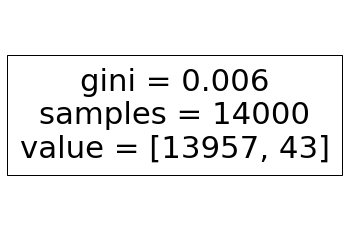

In [127]:
from sklearn import tree
tree.plot_tree(Dec_tree_clsf)

In [123]:
Dec_tree_clsf = DecisionTreeClassifier(random_state=20)
Dec_tree_clsf=Dec_tree_clsf.fit(X_train,y_train)
pred=Dec_tree_clsf.predict(X_test)
print(pred)
print(accuracy_score(y_test,pred))

[0 0 0 ... 0 0 0]
0.9941666666666666


[Text(0.3452197560362173, 0.9705882352941176, 'X[12] <= -4.615\ngini = 0.006\nsamples = 14000\nvalue = [13957, 43]'),
 Text(0.32912317655935613, 0.9117647058823529, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.36131633551307846, 0.9117647058823529, 'X[17] <= -5.023\ngini = 0.005\nsamples = 13989\nvalue = [13957, 32]'),
 Text(0.2913732394366197, 0.8529411764705882, 'X[12] <= -2.967\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.27527665995975853, 0.7941176470588235, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3074698189134809, 0.7941176470588235, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4312594315895372, 0.8529411764705882, 'X[4] <= -4.475\ngini = 0.004\nsamples = 13987\nvalue = [13956, 31]'),
 Text(0.33966297786720323, 0.7941176470588235, 'X[7] <= 0.777\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.32356639839034207, 0.7352941176470589, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.3557595573440644, 0.7352941176470589, 'gini = 0.0\nsamples 

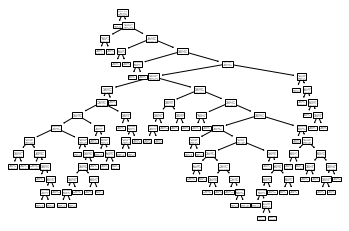

In [124]:
from sklearn import tree
tree.plot_tree(Dec_tree_clsf)

In [121]:
Dec_tree_clsf = DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_split=25, min_samples_leaf=2, max_depth=5, max_features=20, max_leaf_nodes=10,min_impurity_decrease=10)
Dec_tree_clsf=Dec_tree_clsf.fit(X_train,y_train)
pred=Dec_tree_clsf.predict(X_test)
print(pred)
print(accuracy_score(y_test,pred))

[0 0 0 ... 0 0 0]
0.9965


[Text(0.5, 0.5, 'gini = 0.006\nsamples = 14000\nvalue = [13957, 43]')]

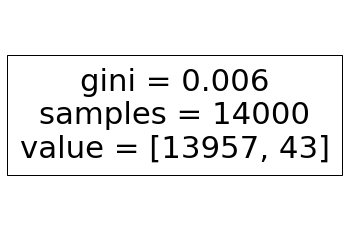

In [122]:
from sklearn import tree
tree.plot_tree(Dec_tree_clsf)

In [ ]:
from sklearn.model_selection  import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score

dec_tree_clsf=DecisionTreeClassifier()

parameters = {'criterion' :['gini','entropy'], 
              'splitter' :['best','random'], 
              'min_samples_split' :[1,50,100,200], 
              'min_samples_leaf' :[1,50,100,200],
              'max_depth' : [5,9,15,20], 
              'max_features' : [10,15,29,30], 
              'max_leaf_nodes' : [15,20,25],
              'min_impurity_decrease' :[0.1,1,]}

accu_score = make_scorer(accuracy_score)

gridsrCv= GridSearchCV(dec_tree_clsf,parameters, scoring=accu_score)

gridsrCv=gridsrCv.fit(X_train, y_train)

print(gridsrCv.best_estimator_)


In [133]:
Dec_tree_clsf = DecisionTreeClassifier(criterion='gini', 
                                       splitter='best',
                                       max_depth=5,
                                       max_features=10,
                                       max_leaf_nodes=15,
                       min_impurity_decrease=0.1, min_samples_split=50)
Dec_tree_clsf=Dec_tree_clsf.fit(X_train,y_train)
pred=Dec_tree_clsf.predict(X_test)
print(pred)
print(accuracy_score(y_test,pred))

[0 0 0 ... 0 0 0]
0.9965


[Text(0.5, 0.5, 'gini = 0.006\nsamples = 14000\nvalue = [13957, 43]')]

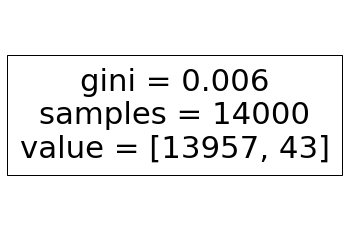

In [134]:
from sklearn import tree
tree.plot_tree(Dec_tree_clsf)

In [130]:
!pip install graphviz

In [136]:
import graphviz 
dot_data = tree.export_graphviz(Dec_tree_clsf) 
graph = graphviz.Source(dot_data) 
graph.render("fraudCredictCard") 

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH